In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy import stats


In [2]:
hp=pd.read_csv('/Users/rae/Desktop/jiuzhang--Rae--practice/houseprice/housedata.csv')

In [3]:
hp.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,4,0,0,0
condition,3,5,4,4,4


In [4]:
hp['yr_renovated']=hp.apply(lambda x: x['yr_renovated'] if x['yr_renovated']!=0 else x['yr_built'],axis=1 )
hp.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,4,0,0,0
condition,3,5,4,4,4


In [5]:
a=list(hp['yr_renovated'])
for i in range(len(a)):
    a[i]=hp['yr_renovated'][i]-hp['yr_renovated'].min()
hp['yr_renovated']=a


b=list(hp['yr_built'])
for i in range(len(b)):
    b[i]=hp['yr_built'][i]-hp['yr_built'].min()
hp['yr_built']=b

In [6]:
hp[['yr_renovated','yr_built']]

,yr_renovated,yr_built
0,105,55
1,21,21
2,66,66
3,63,63
4,92,76
...,...,...
4595,79,54
4596,109,83
4597,109,109
4598,74,74


In [7]:
hp1=pd.get_dummies(hp,columns=['waterfront'])
hp1.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
view,0,4,0,0,0
condition,3,5,4,4,4
sqft_above,1340,3370,1930,1000,1140


In [8]:
hp1['city'] = hp1.apply(lambda x: 'others' if x['city'] != 'Bellevue' and x['city'] != 'Mercer Island' 
                      else x['city'], axis=1)
hp1['city'].value_counts()

others           4228
Bellevue          286
Mercer Island      86
Name: city, dtype: int64

In [9]:
hp1=pd.get_dummies(hp1,columns=['city'])
hp1.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
view,0,4,0,0,0
condition,3,5,4,4,4
sqft_above,1340,3370,1930,1000,1140


In [10]:
hp1['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [11]:
def view(x):
    if x==0:
        return 'Street'
    elif x==2 or x==3:
        return 'Mountain/Forest'
    else:
        return 'Bay/Lake'

In [12]:
hp1['view']=hp1['view'].apply(view)

In [13]:
hp1['view'].value_counts()

Street             4140
Mountain/Forest     321
Bay/Lake            139
Name: view, dtype: int64

In [14]:
hp1=pd.get_dummies(hp1,columns=['view'])
hp1.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
bedrooms,3.0,5.0,3.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340,3650,1930,2000,1940
sqft_lot,7912,9050,11947,8030,10500
floors,1.5,2.0,1.0,1.0,1.0
condition,3,5,4,4,4
sqft_above,1340,3370,1930,1000,1140
sqft_basement,0,280,0,1000,800


In [15]:
hp_num=hp.select_dtypes(include=['float','int']).columns
cor=hp[hp_num].corr()
cor

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,0.002289
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,0.026499
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,0.170196
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,0.099957
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,0.029112
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,0.187006
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,-0.008190
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,-0.023304
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.514397
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,0.163970


<AxesSubplot:>

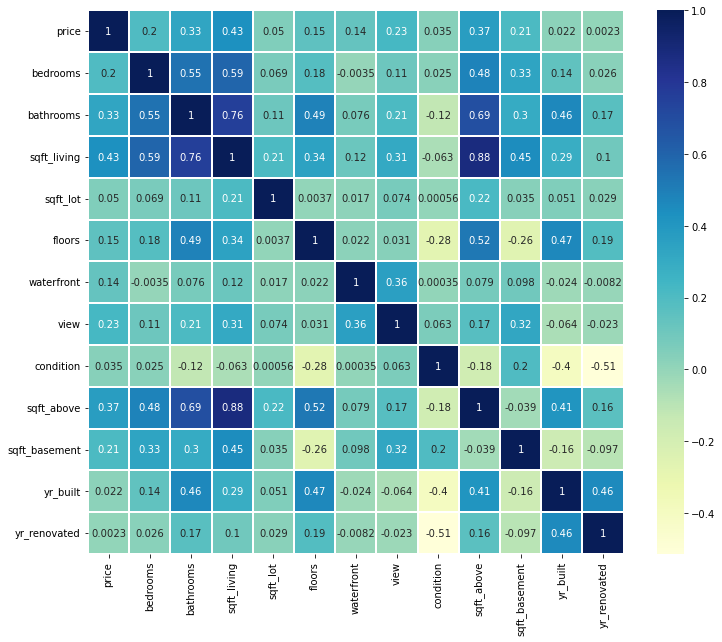

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data=cor,cmap="YlGnBu",annot=True,linewidths=0.4 )

In [17]:
#删掉弱相关的，或重复相关的
del hp1['bedrooms']      #与sqft_living 强相关 0.59
del hp1['bathrooms']     #与sqft_living 强相关 0.76 
del hp1['sqft_lot']      #低于0.1
del hp1['condition']     #低于0.1
del hp1['sqft_above']    #与sqft_living 强相关 0.88
del hp1['sqft_basement'] #与sqft_living 强相关 0.45  以上两个加起来就是sqft_living
del hp1['yr_built']      #低于0.1
del hp1['yr_renovated']  #低于0.1

In [18]:
hp1.head().T

,0,1,2,3,4
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0
sqft_living,1340,3650,1930,2000,1940
floors,1.5,2.0,1.0,1.0,1.0
street,18810 Densmore Ave N,709 W Blaine St,26206-26214 143rd Ave SE,857 170th Pl NE,9105 170th Ave NE
statezip,WA 98133,WA 98119,WA 98042,WA 98008,WA 98052
country,USA,USA,USA,USA,USA
waterfront_0,1,1,1,1,1
waterfront_1,0,0,0,0,0
city_Bellevue,0,0,0,1,0


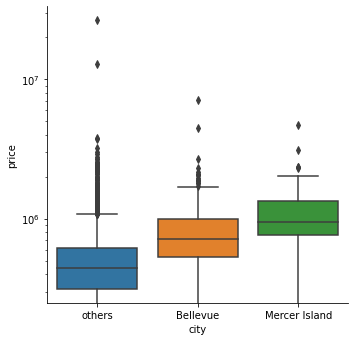

In [19]:
hp['city'] = hp.apply(lambda x: 'others' if x['city'] != 'Bellevue' and x['city'] != 'Mercer Island' 
                      else x['city'], axis=1)

sns.catplot(data=hp,x='city',y='price',kind='box').set(yscale='log')

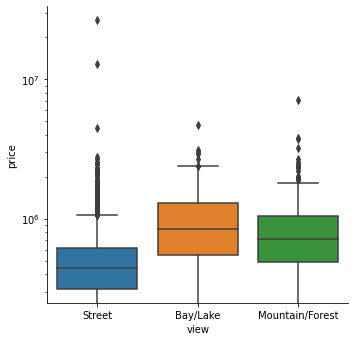

In [20]:
hp['view']=hp['view'].apply(view)
sns.catplot(data=hp,x='view',y='price',kind='box').set(yscale='log')

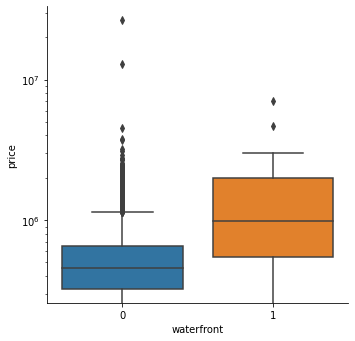

In [21]:
sns.catplot(data=hp,x='waterfront',y='price',kind='box').set(yscale='log')

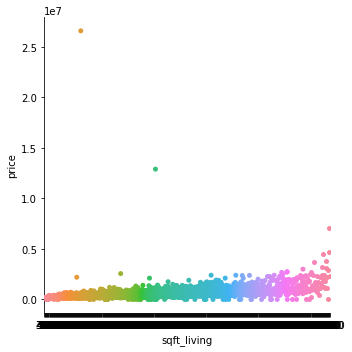

In [22]:
sns.catplot(data=hp,x='sqft_living',y='price',kind='strip')

/Users/rae/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


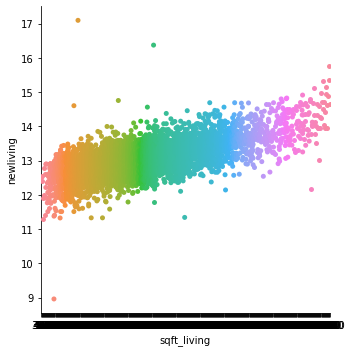

In [23]:
hp['newliving']=np.log(hp['price'])
sns.catplot(data=hp,x='sqft_living',y='newliving',kind='strip')

# 以下用生成好的表格来做

In [103]:
df=pd.read_csv('/Users/rae/Desktop/jiuzhang--Rae--practice/houseprice/houseprice.csv')

In [104]:
x = df[['sqft_living', 'waterfront_Yes' , 'waterfront_No', 
        'view_Bay/Lake', 'view_Mountain/Forest', 'view_Street', 
        'city_Bellevue', 'city_Mercer Island', 'city_others']]
y = np.log(df['price'])


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

model.coef_

array([ 0.00034797,  0.1224106 , -0.1224106 ,  0.11558134,  0.01443453,
       -0.13001587,  0.07338056,  0.15285326, -0.22623382])

In [110]:
pred = model.predict(x_train)
predtest = model.predict(x_test)

print(metrics.mean_squared_error(pred,y_train))
print(metrics.mean_squared_error(predtest,y_test))

0.14147643058656884
0.13416079346514967


In [112]:
print(r2_score(y_train,pred))
print(r2_score(y_test,predtest))

0.5088751726550516
0.5273005818075469
